# Cancer

In [ ]:
import pandas as pd
import seaborn as sns

cancer = pd.read_csv("https://myslu.stlawu.edu/~ltorrey/ml/Cancer.csv")
cancer.head()

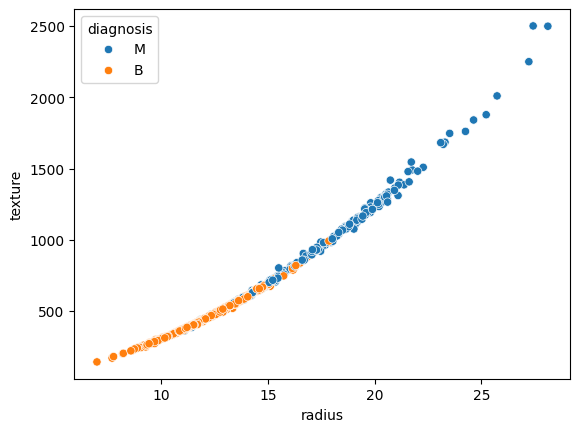

In [2]:
plot = sns.scatterplot(data=cancer,x = "radius", hue="diagnosis", y = "texture")

# Classifications

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

# Seperate features and Target
x = cancer.drop("diagnosis", axis = 1)
y = cancer["diagnosis"]

naive = GaussianNB()
cross_val_score(naive, x, y).mean()

0.9192206179164726

In [5]:
lda = LinearDiscriminantAnalysis()
cross_val_score(lda, x, y).mean()

0.9543238627542306

# Nearest neighbors

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
knn = KNeighborsClassifier()
cross_val_score(knn,x,y).mean()

scaledKNN = make_pipeline(StandardScaler(), KNeighborsClassifier())
cross_val_score(scaledKNN, x,y).mean()

0.9560627231796305

# Classification with tuning

In [21]:
from sklearn.model_selection import GridSearchCV

# List the settings we want to try
hyperparameters = {
    "kneighborsclassifier__n_neighbors":[1,3,5,7,9],
    "kneighborsclassifier__weights":["uniform","distance"]
}
# Nested cross validation due to grid_searching cross valing
tuned_knn = GridSearchCV(scaledKNN, hyperparameters)
cross_val_score(tuned_knn, x, y).mean()

0.956047197640118

In [22]:
final_knn = GridSearchCV(scaledKNN, hyperparameters).fit(x,y)
final_knn.best_params_

{'kneighborsclassifier__n_neighbors': 9,
 'kneighborsclassifier__weights': 'uniform'}